### Uwagi do lekcji 6: Korelacja liniowa i regresja

Sylabus: „Prognozowanie i podstawowe modelowanie”

1. Proste modele liniowe:
     - gradient;
     - punkt przecięcia;
     - obliczenia;
     - wykreślanie na wykresie.
2. Korelacja.
3. Regresja liniowa od podstaw i z funkcji biblioteki scipy.


Interesujące źródła na poniższych stronach:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

http://www.biostat.jhsph.edu/courses/bio621/misc/Chocolate%20consumption%20cognitive%20function%20and%20nobel%20laurates%20%28NEJM%29.pdf

In [1]:
import pandas as pd

In [2]:
bus = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/BritishBusCompanies1951/BritishBusCompanies1951-LinReg-1951.csv")
bus

Expenses per car mile (pence)  Car miles per year (1000s)  \
0                           19.76                        6235   
1                           17.85                       46230   
2                           19.96                        7360   
3                           16.80                       28715   
4                           18.20                       21934   
5                           16.71                        1337   
6                           18.81                       17881   
7                           20.74                        2319   
8                           16.56                       18040   
9                           18.55                        1147   
10                          17.40                        2176   
11                          17.62                       13267   
12                          21.24                        3581   
13                          18.23                       15104   
14                          16.86                       47009   
15                          17.45                       10139   
16                          17.66                        6147   
17                          18.30                       23089   
18                          16.58                       20550   
19                          17.51                        9450   
20                          21.17                        1028   
21                          16.92                        3848   
22                          16.96                       15656   
23                          18.24                        7725   

    Percent of Double Deckers in fleet  Percent of fleet on fuel oil  \
0                               100.00                        100.00   
1                                43.67                         84.53   
2                                65.51                         81.57   
3                                45.16                         93.33   
4                                49.20                         83.07   
5                                74.84                         94.99   
6                                70.66                         92.34   
7                                63.93                         95.08   
8                                14.45                         61.24   
9                                68.58                         97.90   
10                               53.33                         97.50   
11                               25.16                         56.86   
12                               35.76                         63.58   
13                               47.72                         95.29   
14                               17.21                        100.00   
15                               43.15                         89.40   
16                               67.73                         92.54   
17                               33.27                         67.53   
18                               26.61                         98.32   
19                               61.35                         86.72   
20                              100.00                        100.00   
21                                5.35                         65.58   
22                               20.53                         93.72   
23                               50.59                         96.63   

    Receipts per car mile (pence)  
0                           25.10  
1                           19.23  
2                           21.42  
3                           18.11  
4                           19.24  
5                           19.31  
6                           20.07  
7                           24.35  
8                           17.60  
9                           20.13  
10                          18.40  
11                          18.96  
12                          25.75  
13                          19.40  
14                          18.64  
1

<AxesSubplot:xlabel='Expenses per car mile (pence)', ylabel='Receipts per car mile (pence)'>

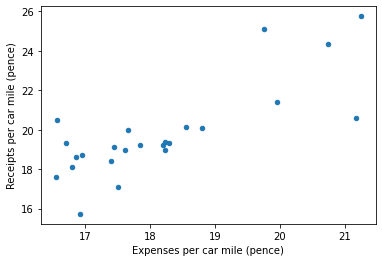

In [3]:
bus.plot.scatter(x="Expenses per car mile (pence)",y="Receipts per car mile (pence)")

Macierz korelacji

In [4]:
bus.corr()

Expenses per car mile (pence)  \
Expenses per car mile (pence)                            1.000000   
Car miles per year (1000s)                              -0.397824   
Percent of Double Deckers in fleet                       0.569748   
Percent of fleet on fuel oil                             0.032195   
Receipts per car mile (pence)                            0.786877   

                                    Car miles per year (1000s)  \
Expenses per car mile (pence)                        -0.397824   
Car miles per year (1000s)                            1.000000   
Percent of Double Deckers in fleet                   -0.439996   
Percent of fleet on fuel oil                         -0.018837   
Receipts per car mile (pence)                        -0.279548   

                                    Percent of Double Deckers in fleet  \
Expenses per car mile (pence)                                 0.569748   
Car miles per year (1000s)                                   -0.439996   
Percent of Double Deckers in fleet                            1.000000   
Percent of fleet on fuel oil                                  0.551176   
Receipts per car mile (pence)                                 0.473471   

                                    Percent of fleet on fuel oil  \
Expenses per car mile (pence)                           0.032195   
Car miles per year (1000s)                             -0.018837   
Percent of Double Deckers in fleet                      0.551176   
Percent of fleet on fuel oil                            1.000000   
Receipts per car mile (pence)                           0.135508   

                                    Receipts per car mile (pence)  
Expenses per car mile (pence)                            0.786877  
Car miles per year (1000s)                              -0.279548  
Percent of Double Deckers in fleet                       0.473471  
Percent of fleet on fuel oil                             0.135508  
Receipts per car mile (pence)                            1.000000

Do obliczenia korelacji r potrzebne są standaryzowane jednostki. Jednostki standaryzowane, to sposób umieszczania różnych rodzajów obserwacji na tej samej skali. Chodzi o to, aby zastąpić daną liczbe odchyleniem standardowym od średniej danych.

In [5]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - any_numbers.mean())/any_numbers.std()

In [6]:
bus_su = standard_units(bus[["Expenses per car mile (pence)","Receipts per car mile (pence)"]])
bus_su.head()

Expenses per car mile (pence)  Receipts per car mile (pence)
0                       1.107273                       2.241825
1                      -0.222847                      -0.251097
2                       1.246552                       0.678971
3                      -0.954065                      -0.726748
4                       0.020892                      -0.246850

In [7]:
bus_su["product of standard units"] = bus_su["Expenses per car mile (pence)"] * bus_su["Receipts per car mile (pence)"]
bus_su.head()

Expenses per car mile (pence)  Receipts per car mile (pence)  \
0                       1.107273                       2.241825   
1                      -0.222847                      -0.251097   
2                       1.246552                       0.678971   
3                      -0.954065                      -0.726748   
4                       0.020892                      -0.246850   

   product of standard units  
0                   2.482312  
1                   0.055956  
2                   0.846373  
3                   0.693365  
4                  -0.005157

In [8]:
bus_r = bus_su["product of standard units"].mean()
bus_r # This is the correlation r

0.7540906311000176

In [9]:
def correlation(df,x,y):
    _df_prod = standard_units(df[x]) * standard_units(df[y])
    return _df_prod.mean()

In [10]:
correlation(bus,"Expenses per car mile (pence)","Receipts per car mile (pence)")

0.7540906311000176

Współczynnik korelacji r nie tylko mierzy, jak skupione są punkty na wykresie punktowym wokół linii prostej. Pomaga również zidentyfikować linię prostą, wokół której zgrupowane są te punkty.

Równanie prostej regresji wygląda następująco: ${\large Estimate\space of\space y = r * x}$ - ale tylko wtedy, gdy obie zmienne są mierzone w jednostkach standaryzowanych. Prowadzi to do następujących równań:

${\large slope\space of\space the\space regression\space line=r*\frac{SD of y}{SD of x}}$

${\large intercept\space of\space the\space regression\space line=avY - slope*avX}$

In [11]:
def slope(df,x,y):
    _r = correlation(df,x,y)
    _std_ratio = df[y].std()/df[x].std()
    return _r * _std_ratio

In [12]:
slope(bus,"Expenses per car mile (pence)","Receipts per car mile (pence)")

1.236546559242266

In [13]:
def intercept(df,x,y):
    #np.mean(t.column(label_y)) - 
    #slope(t, label_x, label_y)*np.mean(t.column(label_x))
    _mean_y = df[y].mean()
    _mean_x = df[x].mean()
    _slope = slope(df,x,y)
    return _mean_y - _mean_x*_slope

In [14]:
intercept(bus,"Expenses per car mile (pence)","Receipts per car mile (pence)")

-2.6468009814319764

In [15]:
def fit(df,x,y):
    m = slope(df,x,y)
    c = intercept(df,x,y)
    return m*df[x]+c

In [16]:
bus["fitted"] = fit(bus,"Expenses per car mile (pence)","Receipts per car mile (pence)")

<AxesSubplot:xlabel='Expenses per car mile (pence)', ylabel='Receipts per car mile (pence)'>

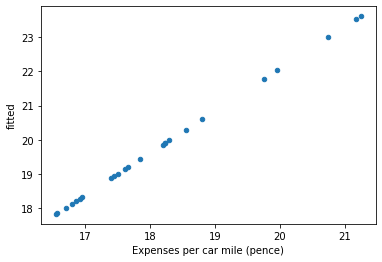

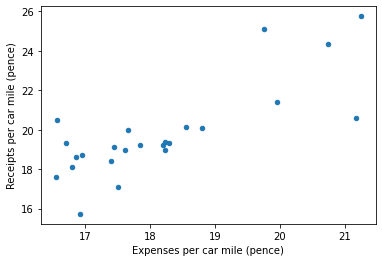

In [17]:
bus.plot.scatter(x="Expenses per car mile (pence)",y="fitted")
bus.plot.scatter(x="Expenses per car mile (pence)",y="Receipts per car mile (pence)")

In [18]:
# Funkcja, która automatycznie przewidzi daną rzecz
m = slope(bus,"Expenses per car mile (pence)","Receipts per car mile (pence)")
c = intercept(bus,"Expenses per car mile (pence)","Receipts per car mile (pence)")

x = lambda a : a + 10
z = int(input("Podaj wejściową wartość wydatków na kilometr jazdy samochodem (pence): "))
print(x(z) , " to przewidywane rachunki za kilometr jazdy samochodem (pence)")

Podaj wejściową wartość wydatków na kilometr jazdy samochodem (pence): 222
232  to przewidywane rachunki za kilometr jazdy samochodem (pence)


In [19]:
#while: 
#    z = int(input("Podaj wejściową wartość wydatków na kilometr jazdy samochodem (pence): "))

In [20]:
def residual(df,x,y):
    return df[y]-fit(df,x,y)

In [21]:
bus["res"] = residual(bus,"Expenses per car mile (pence)","Receipts per car mile (pence)")
bus.head()

Expenses per car mile (pence)  Car miles per year (1000s)  \
0                          19.76                        6235   
1                          17.85                       46230   
2                          19.96                        7360   
3                          16.80                       28715   
4                          18.20                       21934   

   Percent of Double Deckers in fleet  Percent of fleet on fuel oil  \
0                              100.00                        100.00   
1                               43.67                         84.53   
2                               65.51                         81.57   
3                               45.16                         93.33   
4                               49.20                         83.07   

   Receipts per car mile (pence)     fitted       res  
0                          25.10  21.787359  3.312641  
1                          19.23  19.425555 -0.195555  
2                          21.42  22.034668 -0.614668  
3                          18.11  18.127181 -0.017181  
4                          19.24  19.858346 -0.618346

In [22]:
bus["abs res"] = (bus["res"]**2)**0.5

<AxesSubplot:xlabel='Expenses per car mile (pence)', ylabel='res'>

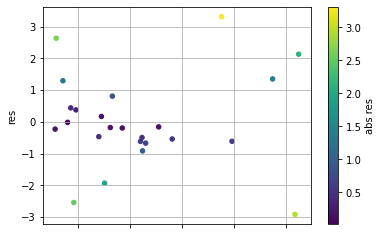

In [23]:
bus.plot.scatter(
    x="Expenses per car mile (pence)",
    y="res",
    grid=True,
    c="abs res",
    colormap='viridis'
)

Wykres resztowy (rezydualny/residuum) dobrej regresji nie wykazuje żadnego wzoru. Reszty wyglądają mniej więcej tak samo, powyżej i poniżej poziomej linii przy 0, w całym zakresie zmiennej predykcyjnej.

Gdy wykres rezydualny pokazuje jakiś wzorzec, może istnieć jakaś nieliniowa relacja między zmiennymi.

Dlatego nasz zestaw danych ma heteroskedastyczność (nierównomierny rozkład).

Jeśli wykres resztowy pokazuje nierównomierną zmienność linii poziomej w punkcie 0, szacunki liniowej regresji nie są równie dokładne w całym zakresie zmiennej predykcyjnej.

Bez względu na kształt wykresu, średnia reszt wynosi 0.

In [37]:
bus["res"].mean() # zero

3.4046839421838135e-15

Bez względu na kształt wykresu punktowego, SD reszt stanowi ułamek SD zmiennej odpowiedzi.

${SD\space of\space res=\sqrt{1-r^2}*SD\space of\space Y}$

In [25]:
#SD of res
bus["res"].std() #Sample

1.4551368407951049

In [26]:
#SD of res
(1-bus_r**2)**0.5 * bus["Receipts per car mile (pence)"].std() #Population

1.5464752693491

${\large \left| r \right| = \frac{SD\space of\space  fitted\space  values}{SD\space  of\space  y\space  values}}$

${\large r^2 = \frac{Var\space of\space  fitted\space  values}{Var\space  of\space  y\space  values}}$

In [27]:
bus_r ** 2

0.5686526799128229

In [28]:
bus["fitted"].var()/bus["Receipts per car mile (pence)"].var()

0.5686526799128231

Testowanie, czy obie są takie same.

In [29]:
round(bus_r ** 2,4) == round(bus["fitted"].var()/bus["Receipts per car mile (pence)"].var(),4)

True

--------

In [30]:
import pandas as pd
birthrate = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/BirthRateEconomicDevelopment/birthrate.csv")
birthrate.head()

Nation  Birth Rate  Per Capita Income  \
0  Venezuela        46.4                392   
1     Mexico        45.7                118   
2    Ecuador        45.3                 44   
3   Colombia        38.6                158   
4     Ceylon        37.2                 81   

   Proportion of population on farms  Infant Mortality Rate  
0                               0.40                   68.5  
1                               0.61                   87.8  
2                               0.53                  115.8  
3                               0.53                  106.8  
4                               0.53                   71.6

In [31]:
birthrate.corr()

Birth Rate  Per Capita Income  \
Birth Rate                           1.000000          -0.419090   
Per Capita Income                   -0.419090           1.000000   
Proportion of population on farms    0.480421          -0.775468   
Infant Mortality Rate                0.664323          -0.745467   

                                   Proportion of population on farms  \
Birth Rate                                                  0.480421   
Per Capita Income                                          -0.775468   
Proportion of population on farms                           1.000000   
Infant Mortality Rate                                       0.696420   

                                   Infant Mortality Rate  
Birth Rate                                      0.664323  
Per Capita Income                              -0.745467  
Proportion of population on farms               0.696420  
Infant Mortality Rate                           1.000000

In [32]:
elect = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/ElectricityConsumptionPrice1937/electricity.csv")
elect.head()

Aberdeen   9.6  19.8  629   0.5  0.33  0.33.1   4.2  4.2.1   0.2  1772  \
0    Barnsley  13.7  78.5  279  0.48  0.48    0.48  10.5   10.5  0.40   532   
1        Bath   6.3  28.2  788  0.55  0.55    0.42   5.5    4.5  1.16  2133   
2  Birmingham  88.7  31.0  486  0.75  0.63    0.50   7.1    7.3  0.31   874   
3   Blackburn  11.8  29.1  403  1.00  0.68    0.50   9.0    9.0  0.29   758   
4   Blackpool   8.9  28.0  730  0.50  0.50    0.50   6.6    6.6  0.73  1989   

   1849  1635  
0   774   630  
1  1821  1974  
2   809   838  
3   606   649  
4  1726  1886

In [33]:
elect.corr()

9.6      19.8       629       0.5      0.33    0.33.1       4.2  \
9.6     1.000000  0.317231 -0.371117 -0.119631 -0.020913 -0.040561 -0.179257   
19.8    0.317231  1.000000 -0.722946  0.008437 -0.117188 -0.062471 -0.243645   
629    -0.371117 -0.722946  1.000000 -0.107792  0.159204  0.160701  0.161405   
0.5    -0.119631  0.008437 -0.107792  1.000000  0.591819  0.440865  0.254302   
0.33   -0.020913 -0.117188  0.159204  0.591819  1.000000  0.747034  0.245135   
0.33.1 -0.040561 -0.062471  0.160701  0.440865  0.747034  1.000000  0.387749   
4.2    -0.179257 -0.243645  0.161405  0.254302  0.245135  0.387749  1.000000   
4.2.1  -0.131045 -0.126426  0.104824  0.348532  0.217301  0.399486  0.842755   
0.2     0.114766  0.452299 -0.313691 -0.245249 -0.073994 -0.057598 -0.096988   
1772   -0.255316 -0.634985  0.770377 -0.374645 -0.224273 -0.158073  0.033184   
1849   -0.377332 -0.652369  0.947525 -0.288370 -0.065137  0.014364  0.186078   
1635   -0.326859 -0.612506  0.907053 -0.306239 -0.122143 -0.042280  0.148509   

           4.2.1       0.2      1772      1849      1635  
9.6    -0.131045  0.114766 -0.255316 -0.377332 -0.326859  
19.8   -0.126426  0.452299 -0.634985 -0.652369 -0.612506  
629     0.104824 -0.313691  0.770377  0.947525  0.907053  
0.5     0.348532 -0.245249 -0.374645 -0.288370 -0.306239  
0.33    0.217301 -0.073994 -0.224273 -0.065137 -0.122143  
0.33.1  0.399486 -0.057598 -0.158073  0.014364 -0.042280  
4.2     0.842755 -0.096988  0.033184  0.186078  0.148509  
4.2.1   1.000000 -0.136826 -0.061055  0.111333  0.084442  
0.2    -0.136826  1.000000 -0.020782 -0.099380 -0.078938  
1772   -0.061055 -0.020782  1.000000  0.859275  0.896805  
1849    0.111333 -0.099380  0.859275  1.000000  0.971444  
1635    0.084442 -0.078938  0.896805  0.971444  1.000000

In [34]:
electtrain = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/ElectricTrainUsage1888/electrictrain.csv")
electtrain.head()

Number of cars operating  Miles per week  Passengers per week
0                        72            2632                18764
1                        48            1211                 6688
2                        77            2604                16504
3                        91            4039                22944
4                        94            5047                25063

In [35]:
electtrain.corr().loc["Week Number","Miles per week"] ** 2

KeyError: 'Week Number'

In [38]:
electtrain["res"] = residual(electtrain,"Week Number","Miles per week")
electtrain["fit"] = fit(electtrain,"Week Number","Miles per week")

KeyError: 'Week Number'

KeyError: 'Week Number'

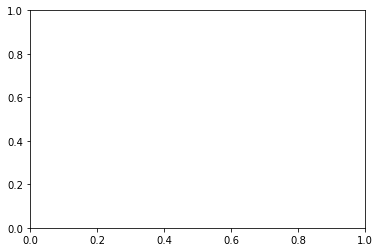

In [39]:
electtrain.plot.scatter(
    x="Week Number",
    y="res"
)
electtrain.plot.scatter(
    x="Week Number",
    y="Miles per week"
)
electtrain.plot.scatter(
    x="Week Number",
    y="fit"
)

<AxesSubplot:xlabel='Number of cars operating', ylabel='Passengers per week'>

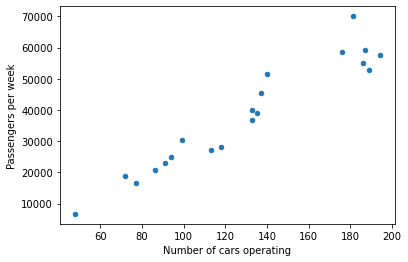

In [40]:
electtrain.plot.scatter(
    x="Number of cars operating",
    y="Passengers per week"
)